# Customer Segmentation Analysis

Aim :
    
Analyse Customer sales data to identify trends, top-selling products, and revenue metrics for business decision-making.

In [3]:
#Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [4]:
#Import Excel File

df = pd.read_excel("C:/Users/HP/Downloads/Adidas US Sales Datasets.xlsx")

df


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2021-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,NaN,Foot Locker,1185732,2022-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0,0.28,Outlet
9648,NaN,Foot Locker,1185732,2022-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet
9649,NaN,Foot Locker,1185732,2022-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet
9650,NaN,Foot Locker,1185732,2022-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8,0.42,Outlet


In [5]:
#Drop the Rows

df = df.drop(df.index[:3],axis=0,inplace=False)

df


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2021-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,NaN,Foot Locker,1185732,2021-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
6,NaN,Foot Locker,1185732,2021-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
7,NaN,Foot Locker,1185732,2021-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,NaN,Foot Locker,1185732,2022-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0,0.28,Outlet
9648,NaN,Foot Locker,1185732,2022-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet
9649,NaN,Foot Locker,1185732,2022-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet
9650,NaN,Foot Locker,1185732,2022-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8,0.42,Outlet


In [6]:
#To get First Row as a Features

df.columns = df.iloc[0]

df = df[0:]


In [7]:
df

3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2021-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,NaN,Foot Locker,1185732,2021-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
6,NaN,Foot Locker,1185732,2021-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
7,NaN,Foot Locker,1185732,2021-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,NaN,Foot Locker,1185732,2022-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0,0.28,Outlet
9648,NaN,Foot Locker,1185732,2022-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet
9649,NaN,Foot Locker,1185732,2022-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet
9650,NaN,Foot Locker,1185732,2022-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8,0.42,Outlet


In [8]:
#Drop the Column

df = df.dropna(axis=1,inplace=False)

df


3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,2021-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,Foot Locker,1185732,2021-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
6,Foot Locker,1185732,2021-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
7,Foot Locker,1185732,2021-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,Foot Locker,1185732,2022-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0,0.28,Outlet
9648,Foot Locker,1185732,2022-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet
9649,Foot Locker,1185732,2022-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet
9650,Foot Locker,1185732,2022-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8,0.42,Outlet


In [9]:
#Drop the Row

df = df.drop(3,axis=0,inplace=False)

df


3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,2021-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,Foot Locker,1185732,2021-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
6,Foot Locker,1185732,2021-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
7,Foot Locker,1185732,2021-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
8,Foot Locker,1185732,2021-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,Foot Locker,1185732,2022-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0,0.28,Outlet
9648,Foot Locker,1185732,2022-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet
9649,Foot Locker,1185732,2022-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet
9650,Foot Locker,1185732,2022-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8,0.42,Outlet


# Exploratory Data Analysis

In [10]:
#Shape of Table

df.shape


(9648, 13)

In [11]:
#Rows & Columns

print("Number of Rows : " , df.shape[0])
print("Number of Column : " , df.shape[1])


Number of Rows :  9648
Number of Column :  13


In [12]:
#Information of Table

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 4 to 9651
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


In [13]:
#Top

df.head(5)


3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,2021-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,Foot Locker,1185732,2021-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
6,Foot Locker,1185732,2021-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
7,Foot Locker,1185732,2021-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
8,Foot Locker,1185732,2021-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [14]:
#Bottom

df.tail(5)


3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
9647,Foot Locker,1185732,2022-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0,0.28,Outlet
9648,Foot Locker,1185732,2022-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet
9649,Foot Locker,1185732,2022-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet
9650,Foot Locker,1185732,2022-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8,0.42,Outlet
9651,Foot Locker,1185732,2022-02-22 00:00:00,Northeast,New Hampshire,Manchester,Women's Street Footwear,29,83,2407,649.89,0.27,Outlet


In [15]:
#Features Name

column_name = df.columns
print(column_name)


Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object', name=3)


In [16]:
#Describe 

df.describe()


3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
count,9648,9648,9648,9648,9648,9648,9648,9648,9648,9648,9648,9648.00,9648
unique,6,4,724,5,50,52,6,146,361,3512,6510,127.00,3
top,Foot Locker,1185732,2022-01-17 00:00:00,West,California,Portland,Men's Street Footwear,50,225,100000,21000,0.35,Online
freq,2637,5265,77,2448,432,360,1610,557,207,52,34,1229.00,4889


# Retailer :

In [17]:

print(df['Retailer'].unique())


['Foot Locker' 'Walmart' 'Sports Direct' 'West Gear' "Kohl's" 'Amazon']


In [18]:

Retailer = df.groupby("Retailer")

Retailer.size()


Retailer
Amazon            949
Foot Locker      2637
Kohl's           1030
Sports Direct    2032
Walmart           626
West Gear        2374
dtype: int64

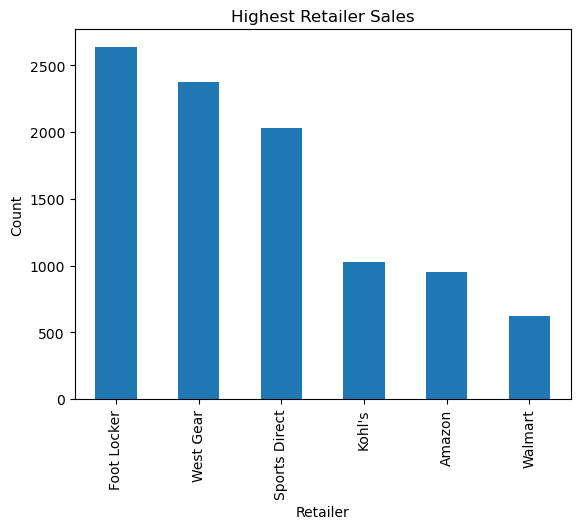

In [19]:

df["Retailer"].value_counts().nlargest(11).plot(kind="bar")
plt.title("Highest Retailer Sales")
plt.xlabel("Retailer")
plt.ylabel("Count")
plt.show()


# Retailer ID :

In [20]:

df['Retailer ID'].value_counts()


Retailer ID
1185732    5265
1128299    2370
1197831    1653
1189833     360
Name: count, dtype: int64

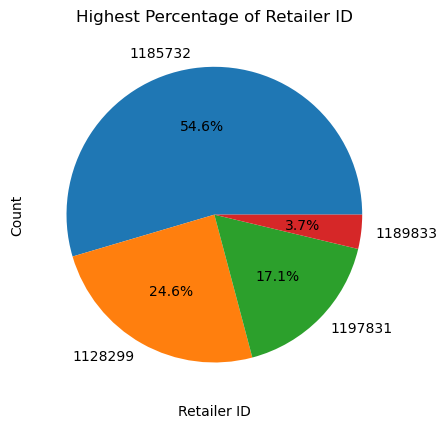

In [21]:

df["Retailer ID"].value_counts().nlargest(11).plot(kind="pie",autopct="%1.1f%%")
plt.title("Highest Percentage of Retailer ID")
plt.xlabel("Retailer ID")
plt.ylabel("Count")
plt.show()


# Invoice Date :

In [22]:

df['Invoice Date'].value_counts()


Invoice Date
2022-01-17    77
2022-08-17    72
2022-03-16    72
2022-04-17    72
2022-11-17    71
              ..
2021-06-14     2
2021-06-15     2
2021-06-17     2
2021-06-18     2
2021-06-16     2
Name: count, Length: 724, dtype: int64

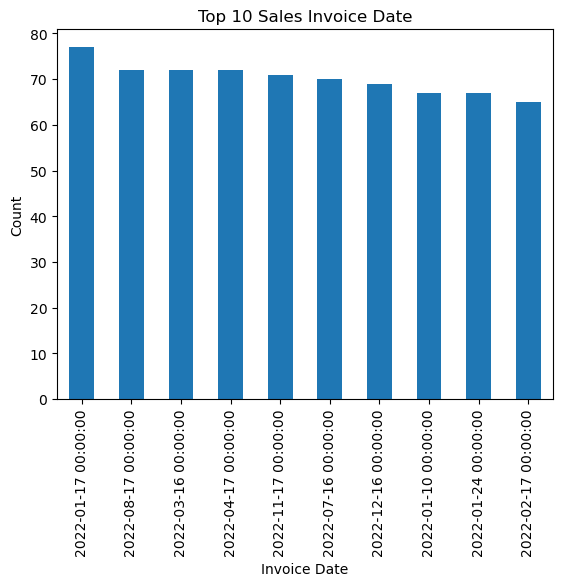

In [23]:

df["Invoice Date"].value_counts().nlargest(10).plot(kind="bar")
plt.title("Top 10 Sales Invoice Date")
plt.xlabel("Invoice Date")
plt.ylabel("Count")
plt.show()


# Region :

In [24]:

df['Region'].value_counts()


Region
West         2448
Northeast    2376
Midwest      1872
South        1728
Southeast    1224
Name: count, dtype: int64

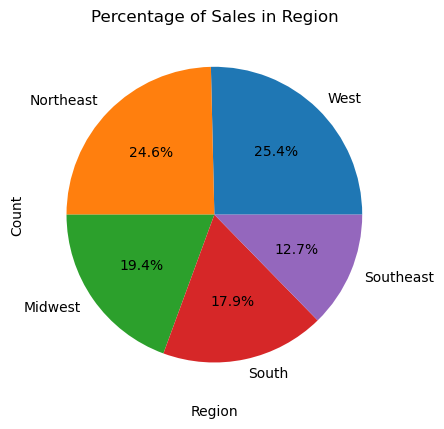

In [25]:

df["Region"].value_counts().nlargest(11).plot(kind="pie",autopct="%1.1f%%")
plt.title("Percentage of Sales in Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()


# State :

In [26]:

df['State'].value_counts()


State
California        432
Texas             432
New York          360
Florida           360
Mississippi       216
Oregon            216
Louisiana         216
Idaho             216
New Mexico        216
Georgia           216
Arkansas          216
Virginia          216
Oklahoma          216
Connecticut       216
Rhode Island      216
Massachusetts     216
Vermont           216
Utah              216
Arizona           216
New Hampshire     216
Pennsylvania      216
Nevada            216
Alabama           216
Tennessee         216
South Dakota      144
Illinois          144
Colorado          144
New Jersey        144
Delaware          144
Maryland          144
West Virginia     144
Indiana           144
Wisconsin         144
Iowa              144
North Dakota      144
Michigan          144
Kansas            144
Missouri          144
Minnesota         144
Montana           144
Kentucky          144
Ohio              144
North Carolina    144
South Carolina    144
Nebraska          144
Main

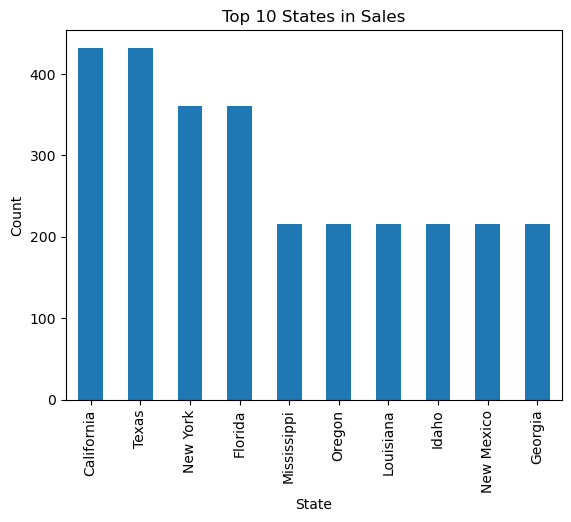

In [27]:

df["State"].value_counts().nlargest(10).plot(kind="bar")
plt.title("Top 10 States in Sales")
plt.xlabel("State")
plt.ylabel("Count")
plt.show()


# City :

In [28]:

df['City'].value_counts()


City
Portland          360
Charleston        288
Orlando           216
Salt Lake City    216
Houston           216
Boise             216
Phoenix           216
Albuquerque       216
Atlanta           216
New York          216
Jackson           216
Little Rock       216
Oklahoma City     216
Hartford          216
Providence        216
Boston            216
Burlington        216
Richmond          216
New Orleans       216
Manchester        216
Dallas            216
Philadelphia      216
Knoxville         216
Birmingham        216
Las Vegas         216
Los Angeles       216
San Francisco     216
Chicago           144
Newark            144
Baltimore         144
Indianapolis      144
Milwaukee         144
Des Moines        144
Fargo             144
Sioux Falls       144
Wichita           144
Wilmington        144
Honolulu          144
Albany            144
Louisville        144
Columbus          144
Charlotte         144
Seattle           144
Miami             144
Minneapolis       144
Billi

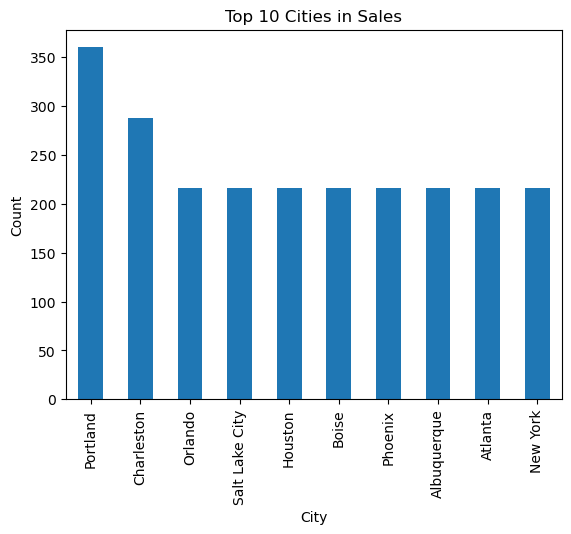

In [29]:

df["City"].value_counts().nlargest(10).plot(kind="bar")
plt.title("Top 10 Cities in Sales")
plt.xlabel("City")
plt.ylabel("Count")
plt.show()


# Product :

In [30]:

print(df['Product'].unique())


["Men's Street Footwear" "Men's Athletic Footwear"
 "Women's Street Footwear" "Women's Athletic Footwear" "Men's Apparel"
 "Women's Apparel"]


In [31]:

df['Product'].value_counts()


Product
Men's Street Footwear        1610
Men's Athletic Footwear      1610
Women's Street Footwear      1608
Women's Apparel              1608
Women's Athletic Footwear    1606
Men's Apparel                1606
Name: count, dtype: int64

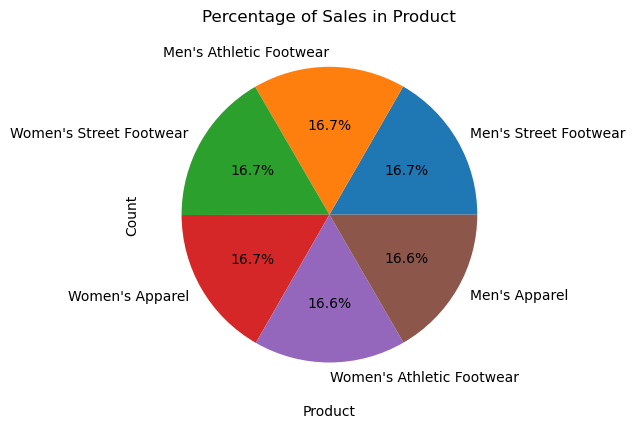

In [32]:

df["Product"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.title("Percentage of Sales in Product")
plt.xlabel("Product")
plt.ylabel("Count")
plt.show()


# Sales Method :

In [33]:

df['Sales Method'].value_counts()


Sales Method
Online      4889
Outlet      3019
In-store    1740
Name: count, dtype: int64

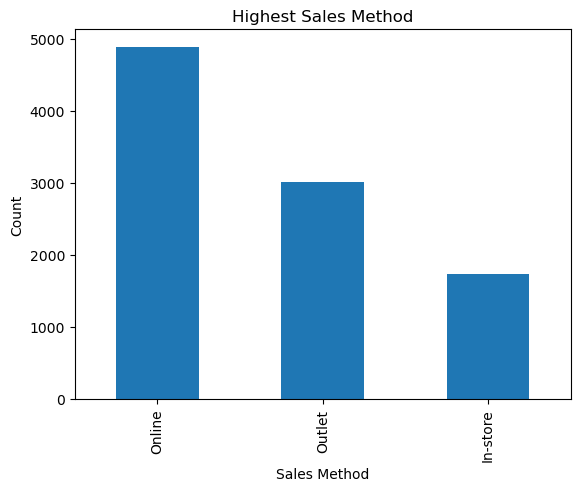

In [44]:

df["Sales Method"].value_counts().plot(kind="bar")
plt.title("Highest Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Count")
plt.show()


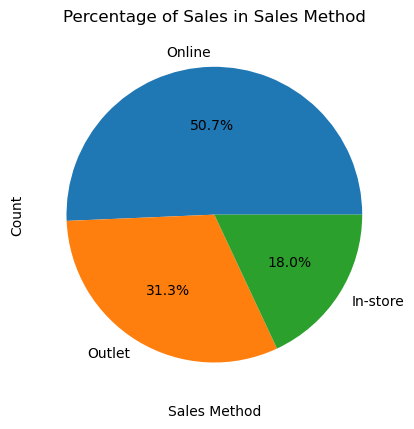

In [34]:

df["Sales Method"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.title("Percentage of Sales in Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Count")
plt.show()


# Conclusion :

From this project we conclude that the highest sales generated by Foot Locker Retailer. Out of this 1185732 is a 
maximum sales Retailer ID which is 54.6%. The highest sales are happened on 17-01-2022 this day. The highest
sales were in West Region which is 25.4%. California and Texas both had the highest sales in the States and the 
Portland had the highest sales in the City. All the Products of Men and Women were sold in the same percentage. 
Most of the sales were done Online which is 50.7% and the lowest sales were from In-Store which is 18.0%.